<div class="span5 alert alert-success">
<p> This workbook contains inferential statistics for the Windfarm project </p>
</div>

<div class="span5 alert alert-success">
<p> Prepare </p>
</div>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
#Load the zipcodes with a windfarm csv file to a dataframe
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Repository\09 CapstoneProject1Data\InferentialStatsData

df_wfzc = pd.read_csv('project1_zipcodes_with_windfarms.csv')

df_wfzc.head(1)

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Repository\09 CapstoneProject1Data\InferentialStatsData


,Unnamed: 0,wf_zipcode,state,county,latitude,longitude,windmills_count,pop_density,med_household_income,zipcode_withno_wf,...,2018-01,percent_2010_change,percent_2011_change,percent_2012_change,percent_2013_change,percent_2014_change,percent_2015_change,percent_2016_change,percent_2017_change,percent_2018_change
0,0,1507,MA,Worcester County,42.110889,-72.003899,1,308,93963.0,0,...,276000.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.083052,0.002946,0.013216


In [5]:
#Load the zipcodes without a windfarm csv file to a dataframe
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\InferentialStatsData

df_wfnz = pd.read_csv('project1_zipcodes_withno_windfarms.csv')

df_wfnz.head(1)

[WinError 3] The system cannot find the path specified: 'C:\\Users\\Ken\\Documents\\KenP\\Applications-DataScience\\SpringboardCourseWork\\CapstoneProject1Downloads\\InferentialStatsData'
C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Repository\09 CapstoneProject1Data\InferentialStatsData


,Unnamed: 0,wf_zipcode,state,county,latitude,longitude,windmills_count,pop_density,med_household_income,zipcode_withno_wf,...,2018-01,percent_2010_change,percent_2011_change,percent_2012_change,percent_2013_change,percent_2014_change,percent_2015_change,percent_2016_change,percent_2017_change,percent_2018_change
0,0,1507,MA,Worcester County,42.15,-71.52,0,1886.0,66547,1757,...,290300.0,0.0,0.0,0.0,0.129384,0.086446,0.020857,0.02535,0.058303,0.012204


In [6]:
#Merge each zipcode with windfarms with the corresponding zipcode (25 miles away) without a windfarm
#and write out to a dataframe and csv file

#Merge in zip code, as inner join
df_m = pd.merge(left=df_wfzc, right=df_wfnz, on=None, left_on='wf_zipcode', right_on='wf_zipcode')

out_csv = 'project1_zipcodes_with_and_without_windfarms.csv'

df_m.to_csv(out_csv)

df_m.head(1)

,Unnamed: 0_x,wf_zipcode,state_x,county_x,latitude_x,longitude_x,windmills_count_x,pop_density_x,med_household_income_x,zipcode_withno_wf_x,...,2018-01_y,percent_2010_change_y,percent_2011_change_y,percent_2012_change_y,percent_2013_change_y,percent_2014_change_y,percent_2015_change_y,percent_2016_change_y,percent_2017_change_y,percent_2018_change_y
0,0,1507,MA,Worcester County,42.110889,-72.003899,1,308,93963.0,0,...,290300.0,0.0,0.0,0.0,0.129384,0.086446,0.020857,0.02535,0.058303,0.012204


<div class="span5 alert alert-success">
<p> Correlations between pairs of independent variables </p>
</div>

[[1.         0.47062856]
 [0.47062856 1.        ]]


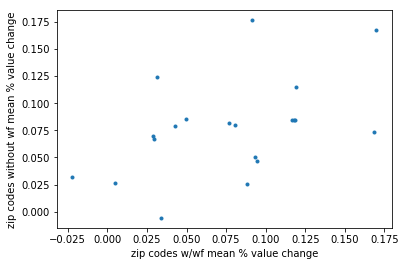

In [7]:
#RESEARCH CORRELATION OF HOME VALUE CHANGES BETWEEN ZIP CODES WITH AND WITHOUT WINDFARMS

#calculate percent change in value mean for years 2016 - 2018 for zip codes with windfarms
df_zc_wf = df_m[['percent_2016_change_x','percent_2017_change_x','percent_2018_change_x']]
df_zc_wf['wf_mean'] = df_zc_wf.mean(axis=1)
df_zc_wf['wf_zipcode'] = df_m['wf_zipcode']
#df_zc_wf['wf_mean'] = df_zc_wf.iloc[[0,1]].mean(axis=1)   - why does this work for only two rows then returns, NaN

#calculate percent change in value mean for years 2016 - 2018 for zip codes without windfarms
df_zc_nwf = df_m[['percent_2016_change_y','percent_2017_change_y','percent_2018_change_y']]
df_zc_nwf['nwf_mean'] = df_zc_nwf.mean(axis=1)
df_zc_nwf['nwf_zipcode'] = df_m['zipcode_withno_wf_y']

#calculate pearson correlation coefficient for mean change in home value for zipcodes with windfarms and without windfarms
df_corr = pd.DataFrame()
df_corr['wf_mean'] = df_zc_wf['wf_mean']
df_corr['nwf_mean'] = df_zc_nwf['nwf_mean']

corr_value = np.corrcoef(df_corr['wf_mean'], df_corr['nwf_mean'])
print(corr_value)

# Make a scatter plot
_ = plt.plot(df_corr['wf_mean'], df_corr['nwf_mean'],
             marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('zip codes w/wf mean % value change')
_ = plt.ylabel('zip codes without wf mean % value change')

# Show the result
plt.show()


zip codes with windfarm pop density corr coef: [[1.         0.22902256]
 [0.22902256 1.        ]]
zip codes without windfarm pop density corr coef: [[1.         0.24720173]
 [0.24720173 1.        ]]


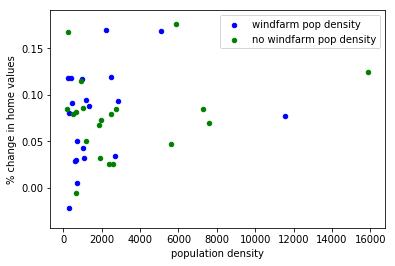

In [8]:
#RESEARCH CORRELATION BETWEEN POPULATION DENSITY AND MEAN PERCENT CHANGE IN HOME VALUES IN ZIPCODES WITH WINDFARMS 
#AND WITHOUT WINDFARMS

#calculate pearson correlation coefficient
df_corr2 = pd.DataFrame()
df_corr2['wf_pop_density'] = df_m['pop_density_x']
df_corr2['wf_mean'] = df_zc_wf['wf_mean']
df_corr2['nwf_pop_density'] = df_m['pop_density_y']
df_corr2['nwf_mean'] = df_zc_nwf['nwf_mean']

print('zip codes with windfarm pop density corr coef: ' + str(np.corrcoef(df_corr2['wf_pop_density'], df_corr2['wf_mean'])))

print('zip codes without windfarm pop density corr coef: ' + str(np.corrcoef(df_corr2['nwf_pop_density'], df_corr2['nwf_mean'])))

#Plot population density versus %home value change for 2016 - 2018
ax = df_corr2.plot(kind='scatter', x='wf_pop_density',y='wf_mean', color='b', label='windfarm pop density')
df_corr2.plot(kind='scatter',x='nwf_pop_density',y='nwf_mean', color='g', label='no windfarm pop density', ax=ax)

ax.set_xlabel('population density')
ax.set_ylabel('% change in home values')
plt.show()


zip codes with windfarm median household income corr coef: [[ 1.         -0.18776464]
 [-0.18776464  1.        ]]
zip codes without windfarm median household income corr coef: [[ 1.         -0.41132661]
 [-0.41132661  1.        ]]


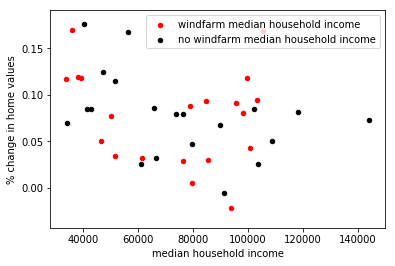

In [9]:
#RESEARCH CORRELATION BETWEEN MEDIAN HOUSEHOLD INCOME AND MEAN PERCENT CHANGE IN HOME VALUES IN ZIPCODES WITH WINDFARMS 
#AND WITHOUT WINDFARMS

#calculate pearson correlation coefficient
df_corr3 = pd.DataFrame()

df_corr3['wf_med_household_income'] = df_m['med_household_income_x']
df_corr3['wf_mean'] = df_zc_wf['wf_mean']

df_corr3['nwf_med_household_income'] = df_m['med_household_income_y']
df_corr3['nwf_mean'] = df_zc_nwf['nwf_mean']

print('zip codes with windfarm median household income corr coef: ' + 
      str(np.corrcoef(df_corr3['wf_med_household_income'], df_corr3['wf_mean'])))

print('zip codes without windfarm median household income corr coef: ' +
      str(np.corrcoef(df_corr3['nwf_med_household_income'], df_corr3['nwf_mean'])))

#Plot median household income versus %home value change for 2016 - 2018
ax = df_corr3.plot(kind='scatter', x='wf_med_household_income',y='wf_mean', color='red', label='windfarm median household income')
df_corr3.plot(kind='scatter',x='nwf_med_household_income',y='nwf_mean', color='black', label='no windfarm median household income', ax=ax)

ax.set_xlabel('median household income')
ax.set_ylabel('% change in home values')
plt.show()


<div class="span5 alert alert-success">
<p> ECDF of home value change (as a percentage) in zipcodes with wind farms and without wind farms </p>
</div>

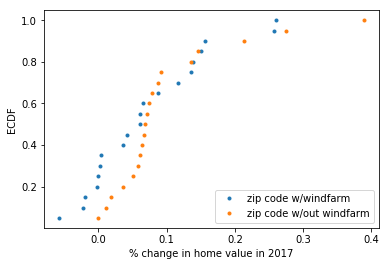

In [10]:
#ECDF USING THE YEAR 2017
df_wf_e2017 = df_m['percent_2017_change_x']
df_nwf_e2017 = df_m['percent_2017_change_y']

#function to calculate ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    n = len(data)
    
    x = np.sort(data)
    
    y = np.arange(1,n+1)/n
    
    return x, y

# Compute ECDFs
x_wf, y_wf = ecdf(df_wf_e2017)
x_nwf,y_nwf = ecdf(df_nwf_e2017)

# Plot all ECDFs on the same plot
_ = plt.plot(x_wf,y_wf, marker ='.', linestyle='none')
_ = plt.plot(x_nwf,y_nwf, marker ='.', linestyle='none')

# Annotate the plot
plt.legend(('zip code w/windfarm', 'zip code w/out windfarm'), loc='lower right')
_ = plt.xlabel('% change in home value in 2017')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


<div class="span5 alert alert-success">
<p> Plot a linear regression for CA zipcode 95391 which is a zipcode with a windfarm </p>
</div>

slope (a) for zipcode 95391 in CA:  0.017185513701719883
intercept (b) for zipcode 95391 in CA:  -0.012174395720681318


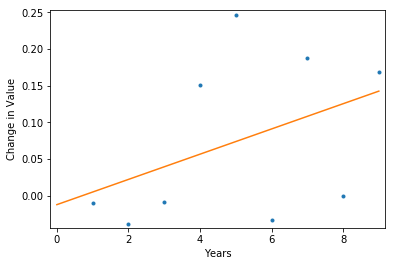

In [11]:
#Linear regression for zip code 95391 in CA with a windfarm
df_lr = df_m.iloc[:, np.r_[1,24:33]]
df_lr = df_lr[df_lr.wf_zipcode == 95391]

df_lr.index = pd.Index(['value_change'],name='year')

df_lrt = df_lr.T
df_lrt = df_lrt.drop('wf_zipcode', axis=0)

x = np.array([1,2,3,4,5,6,7,8,9])  #years 2009 - 2018
y = df_lrt.iloc[:,0].values

# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)

# Print the slope and intercept
#print('slope: ' + str(a))
#print('intercept: ' + str(b))

# Plot the illiteracy rate versus fertility
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Years')
_ = plt.ylabel('Change in Value')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x,y, 1)

# Print the results to the screen
print('slope (a) for zipcode 95391 in CA: ', a)
print('intercept (b) for zipcode 95391 in CA: ', b)

# Make theoretical line to plot
x = np.array([0, 9])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


<div class="span5 alert alert-success">
<p> Plot a linear regression for CA zipcode 94550 which is a zipcode 25 miles away that does not have a windfarm </p>
</div>

slope (a) for zipcode 94550 in CA:  0.009266966968780507
intercept (b) for zipcode 94550 in CA:  0.03705137056071288


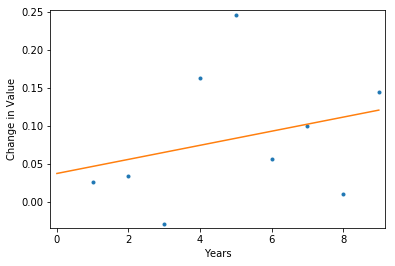

In [12]:
#Linear regression for zip code 94550 in CA with a windfarm
df_lr = df_m.iloc[:, np.r_[1,56:65]]
df_lr = df_lr[df_lr.wf_zipcode == 95391]

df_lr.index = pd.Index(['value_change'],name='year')
df_lrt = df_lr.T
df_lrt = df_lrt.drop('wf_zipcode', axis=0)

x = np.array([1,2,3,4,5,6,7,8,9])  #years 2009 - 2018
y = df_lrt.iloc[:,0].values

# Plot the illiteracy rate versus fertility
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Years')
_ = plt.ylabel('Change in Value')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x,y, 1)

# Print the results to the screen
print('slope (a) for zipcode 94550 in CA: ', a)
print('intercept (b) for zipcode 94550 in CA: ', b)

# Make theoretical line to plot
x = np.array([0, 9])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


<div class="span5 alert alert-success">
<p> Compute p-values and confidence intervals for zip codes with and zip codes without wind farms. </p>
</div>

In [13]:
#1 of 5: DETERMINE IF THE MEAN HOME VALUE FOR ZIPCODES WITH WINDFARMS IS A STATISTICALLY SIGNIFICANT DIFFERENCE FROM THE MEAN
#VALUE OF ZIPCODES WITHOUT A WINDFARM

#Hypothesis
#H0: average mean home value for zipcodes with windfarms < mean home value for zipcodes without windfarms
#H1: average mean home value for zipcodes with windfarms >= mean home value for zipcoes without windfarms

Mean home value for zipcodes with windfarms: 360620.0


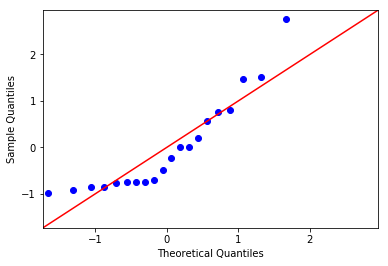

In [14]:
#2 of 5: Quartile plot for zipcodes with windfarms using 2017 home value data

df_wf = df_m[['2017-01_x']]
print('Mean home value for zipcodes with windfarms: ' + str(np.mean(df_wf['2017-01_x'])))

#Visually look for a normal distribution via a Quartile Plot
mean = np.mean(df_wf['2017-01_x'])
sd = np.std(df_wf['2017-01_x'])
z = (df_wf['2017-01_x'] - mean) / sd
sm.qqplot(z, line='45')

plt.show()


Mean home value for zipcodes without windfarms: 402090.0


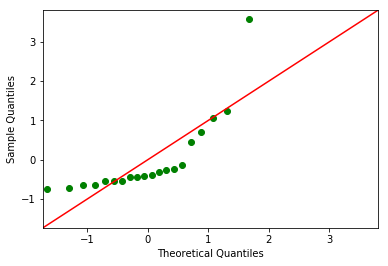

In [15]:
#3 of 5: Quartile plot for zipcodes without windfarms using 2017 home value data

df_nwf = df_m[['2017-01_y']]

print('Mean home value for zipcodes without windfarms: ' + str(np.mean(df_nwf['2017-01_y'])))

#Visually look for a normal distribution via a Quartile Plot
mean = np.mean(df_nwf['2017-01_y'])
sd = np.std(df_nwf['2017-01_y'])
z = (df_nwf['2017-01_y'] - mean) / sd
sm.qqplot(z, line='45',color='green')

plt.show()


In [16]:
#4a of 5: Calculate p-value - obtain the 2017 home values and create arrays

zcwf = df_wf.iloc[:,0].values
zcnwf = df_nwf.iloc[:,0].values

print(zcwf)
print(zcnwf)

[272400. 362900. 496700. 395800. 318900. 226300. 204900. 226600. 220100.
 234100. 624700. 225900. 181700. 361100. 206700. 196600. 858000. 634400.
 461100. 503500.]
[ 286800.  317400.  366900.  585100.  210000.  336000.  263900.  521700.
  300900.  235300.  677900.  257800.  261900.  291100.  287800.  231500.
 1331400.  212800.  341700.  723900.]


In [17]:
#4b of 5: Calculate p-value

#Function Difference of Means
def diff_of_means(data_1, data_2,size):
    
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

#Function Permutation Sample function
def permutation_sample(data1, data2):
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

#Function for Permutation Replicates
def draw_perm_reps(data_1, data_2, func, size):
    
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2,size=size)
        
        return perm_replicates

In [18]:
#4c of 5: Calculating the p-value

# Compute difference of mean
empirical_diff_means = diff_of_means(zcwf, zcnwf,1)

# Draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(zcwf, zcnwf,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print results
print('Mean home value for zipcodes with windfarms: ' + str(np.mean(df_wf['2017-01_x'])))
print('Mean home value for zipcodes without windfarms: ' + str(np.mean(df_nwf['2017-01_y'])))
print('p-value =', p)


Mean home value for zipcodes with windfarms: 360620.0
Mean home value for zipcodes without windfarms: 402090.0
p-value = 0.9916


In [19]:
#5a of 5: Calculate a confidence interval

#Function to return a value using Bootstrap Replicates
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data,size=len(data))
    return func(bs_sample)

#Function to define many bootstrap replicates
def draw_bs_reps(data, func, size=10000):
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


In [20]:
#5b of 5: Calculate a confidence interval

# Compute 95% confidence interval: conf_int

# Compute the difference of the sample means
mean_diff = np.mean(zcnwf) - np.mean(zcwf)

# Get bootstrap replicates of means
bs_replicates_zcnwf = draw_bs_reps(zcnwf, np.mean, 10000)
bs_replicates_zcwf = draw_bs_reps(zcwf, np.mean, 10000)

# Compute samples of difference of means:
bs_diff_replicates = bs_replicates_zcnwf - bs_replicates_zcwf

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff)
print('95% confidence interval =', conf_int)


difference of means = 41470.0
95% confidence interval = [-86669.5 185072.5]
